# Part I Import packages and data

In [4]:
# Basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data provessing and machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
import shap

print('packages installed')

packages installed


In [5]:
data = pd.read_csv('Churn_Modelling.csv')
# Remove irrelevant features
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Summary statistics
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Defined variables

# Color
DarkBlue = "#24477F"
LightBlue = "#00AEEF"
White = "#FFFFFF"
Black = "#000000"
MediumBlue = "#005EB8"
SkyBlue = "#7EC8E3"
Orange = "#EF7C00"

# Part II Exploratory data analysis

In [8]:
# Check missing value
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

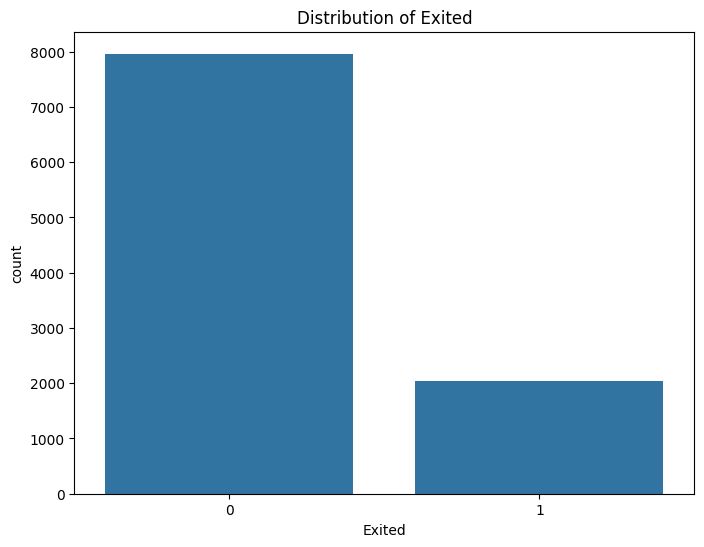

In [9]:
# Distribution of the target variable 'Exited'
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

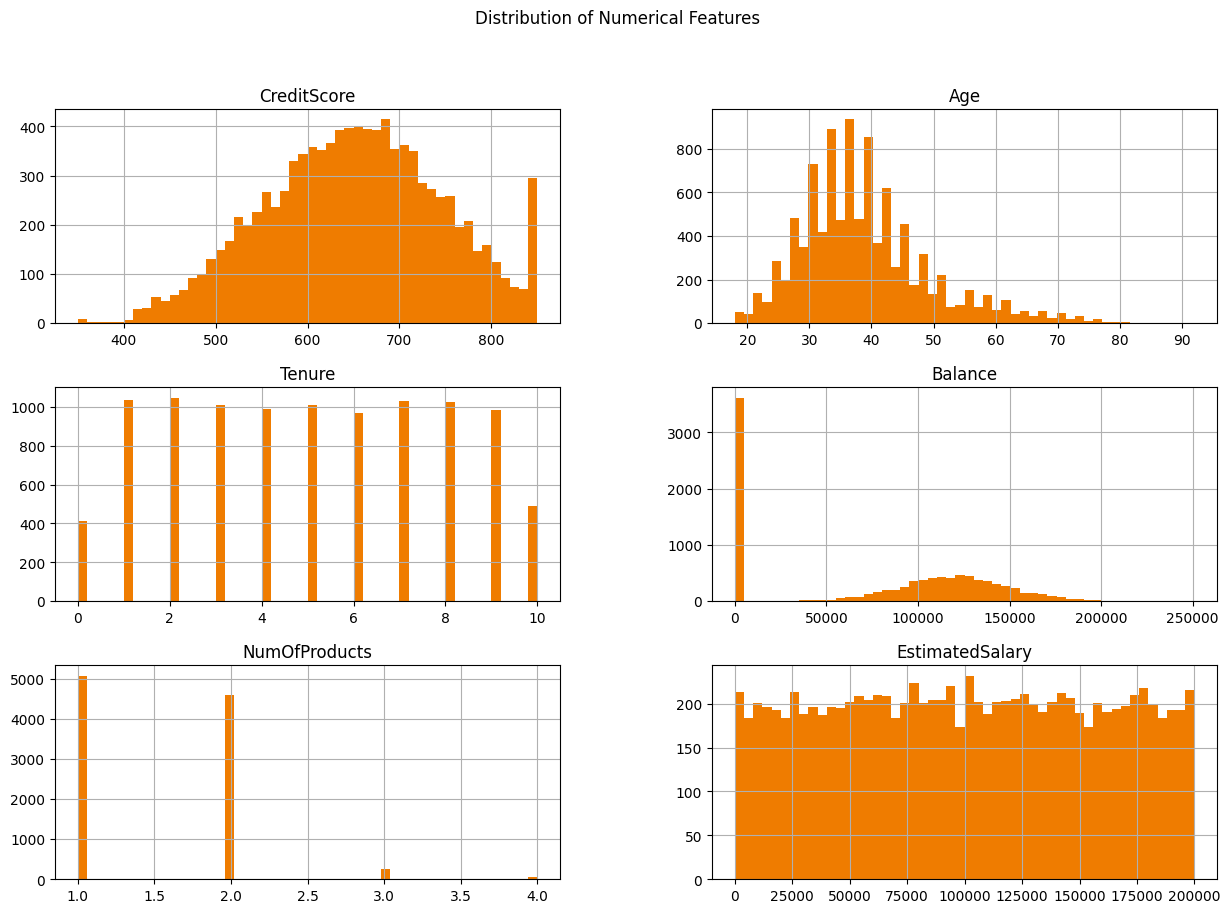

In [10]:
# Distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features].hist(bins=50, figsize=(15, 10), layout=(3, 2), color = Orange)
plt.suptitle('Distribution of Numerical Features')
plt.show()

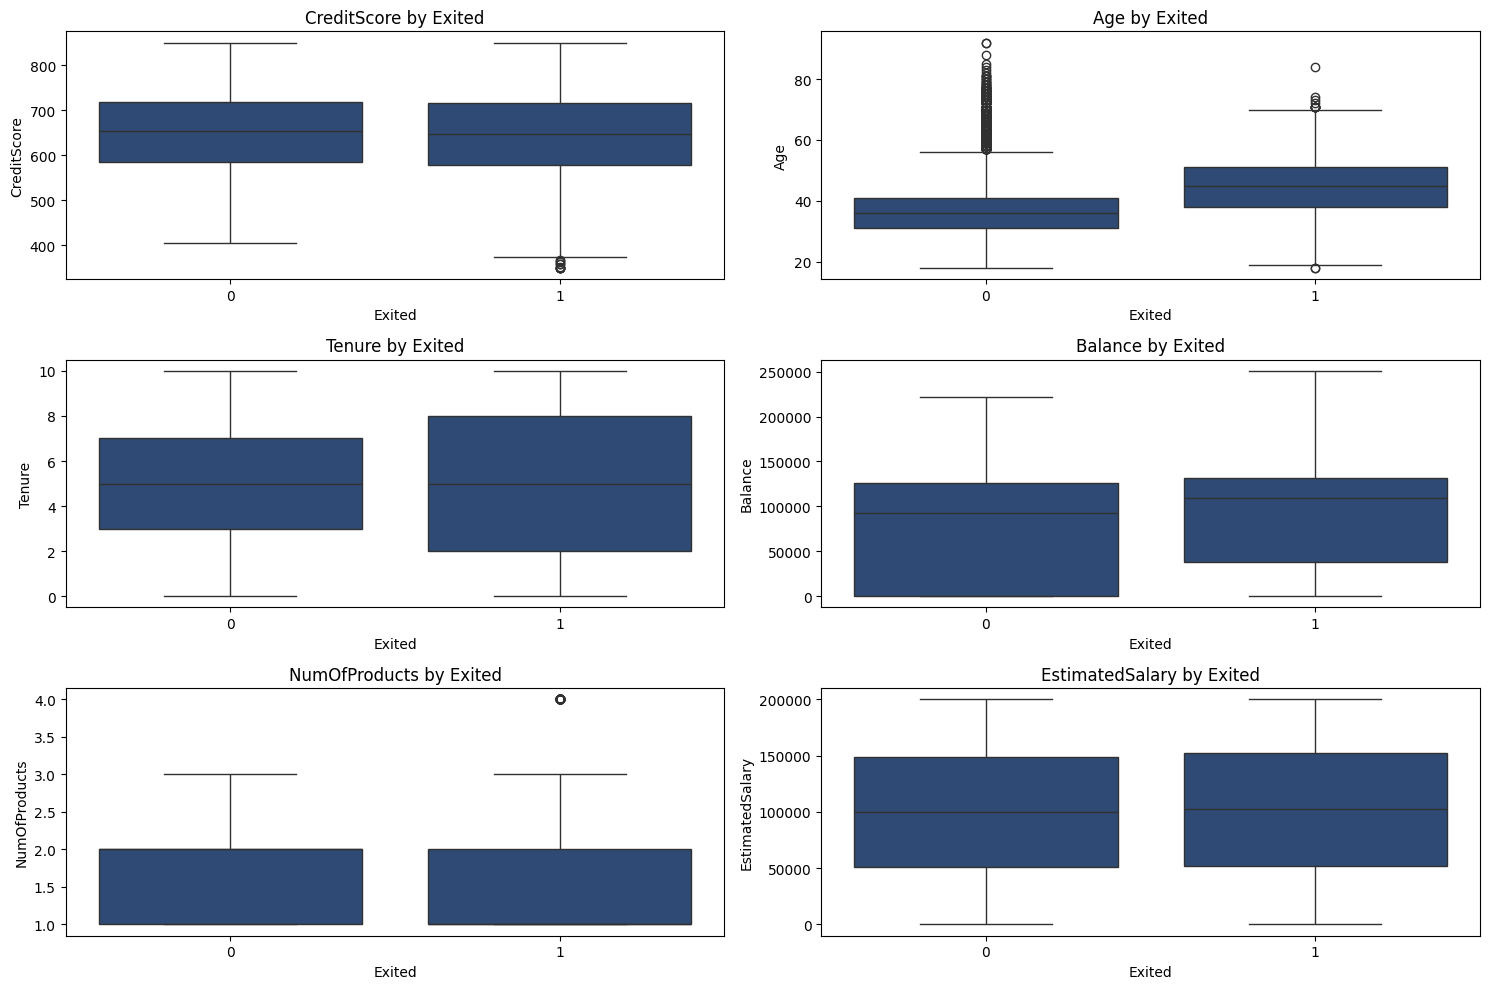

In [11]:
# Boxplots of numerical features by target variable 'Exited'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Exited', y=feature, data=data, color = DarkBlue)
    plt.title(f'{feature} by Exited')
plt.tight_layout()
plt.show()

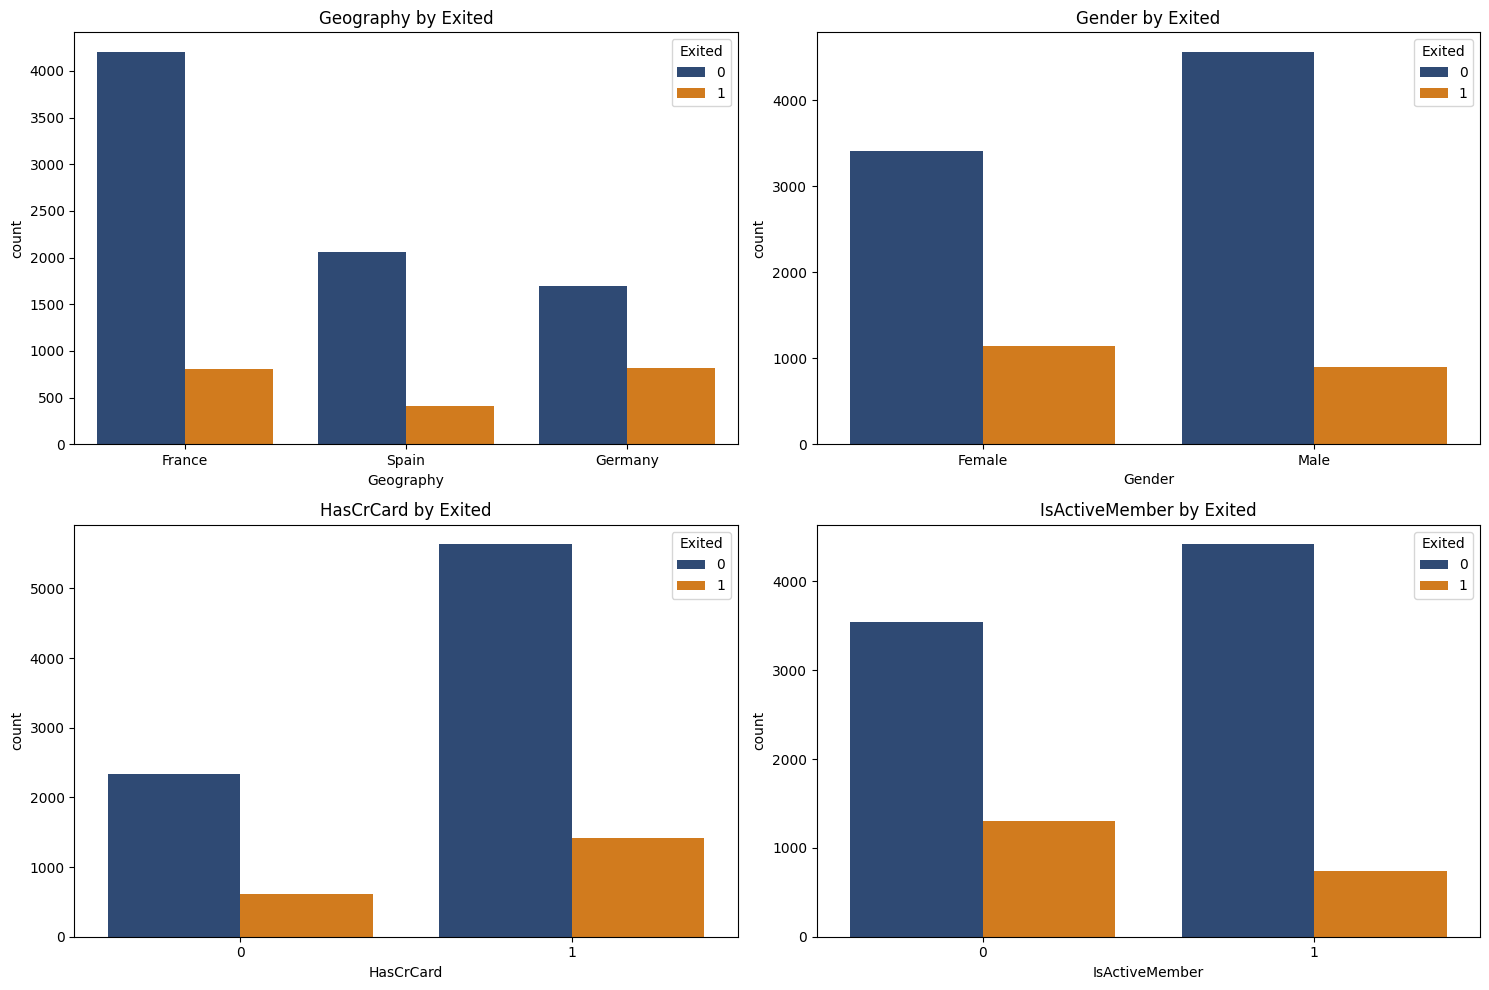

In [12]:
# Countplots of categorical features by target variable 'Exited'
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(15, 10))

palette = {
    0: DarkBlue,
    1: Orange
}

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='Exited', data=data, palette = palette)
    plt.title(f'{feature} by Exited')
plt.tight_layout()
plt.show()

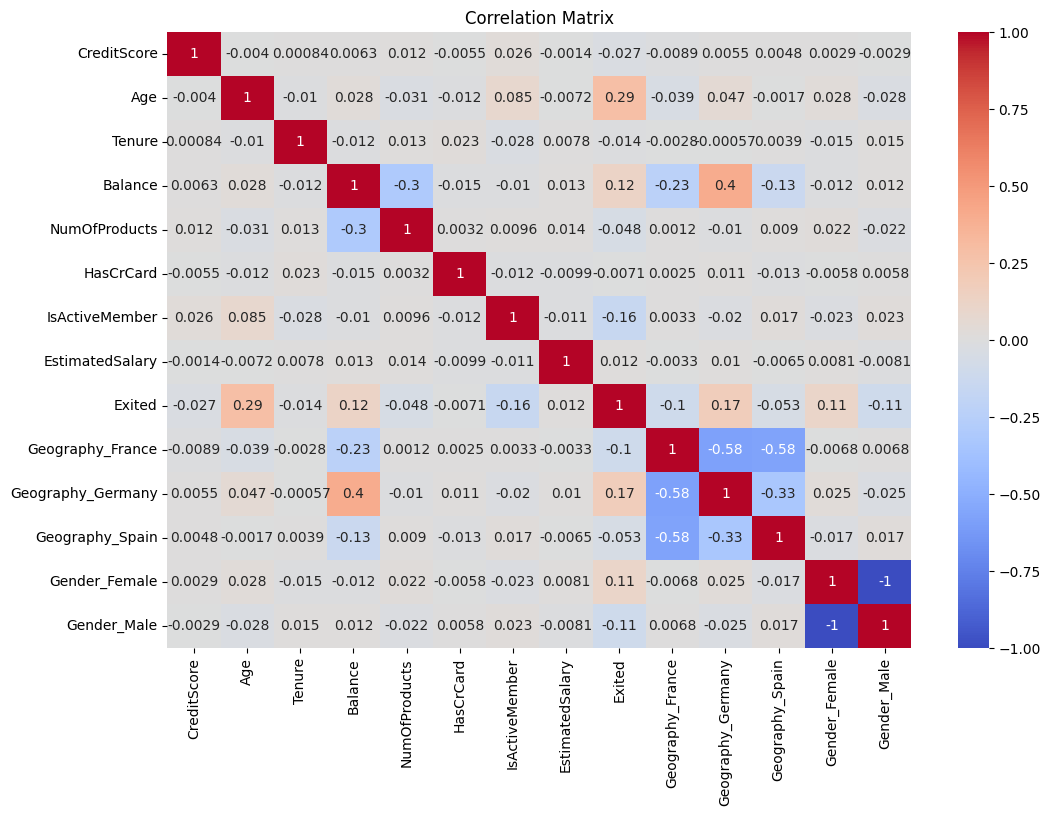

In [13]:
numerical_data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=False)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Part III Data preprocessing

In [14]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


In [16]:
# For logistic regression, change drop_first = True
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=False)

In [17]:
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

In [18]:
# This way, we have 60% of training, 20% of validation, and 20% of testing. 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
# Apply SMOTE to balance the dataset
brf = BalancedRandomForestClassifier(random_state=42)

# Fit the model on the training data
brf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = brf.predict(X_val)

# Evaluate the model
print("Validation Set Evaluation")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Predict on the test set
y_test_pred = brf.predict(X_test)

# Evaluate the model
print("Test Set Evaluation")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. 

Validation Set Evaluation
[[1276  344]
 [ 113  267]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1620
           1       0.44      0.70      0.54       380

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.83      0.77      0.79      2000

Test Set Evaluation
[[1263  307]
 [  95  335]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1570
           1       0.52      0.78      0.62       430

    accuracy                           0.80      2000
   macro avg       0.73      0.79      0.74      2000
weighted avg       0.84      0.80      0.81      2000



# Part IV - Machine learning

## Part IV-1 Untuned machine learning

In [20]:
# Initialize the Explainable Boosting Machine classifier
ebm = ExplainableBoostingClassifier(random_state=42)

# Fit the model on the training data
ebm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = ebm.predict(X_val)

# Evaluate the model
print("Validation Set Evaluation")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Predict on the test set
y_test_pred = ebm.predict(X_test)

# Evaluate the model
print("Test Set Evaluation")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Interpret the model
ebm_global = ebm.explain_global()
show(ebm_global)

Validation Set Evaluation
[[1556   64]
 [ 199  181]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1620
           1       0.74      0.48      0.58       380

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

Test Set Evaluation
[[1518   52]
 [ 213  217]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1570
           1       0.81      0.50      0.62       430

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



<!-- http://127.0.0.1:7001/1584712738064/ -->

## Part IV-2 Hypterpameter tunes

## If we use SMOTE to balance the training set

In [21]:
%time

# Apply SMOTE to balance the training set
smote = BorderlineSMOTE(random_state=42, kind= "borderline-2")
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train_res[numerical_features] = scaler.fit_transform(X_train_res[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize the Explainable Boosting Machine classifier
ebm = ExplainableBoostingClassifier(random_state=42)

# Fit the model on the training data
ebm.fit(X_train_res, y_train_res)

# Predict on the validation set
y_val_pred = ebm.predict(X_val)

# Evaluate the model
print("Validation Set Evaluation")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Predict on the test set
y_test_pred = ebm.predict(X_test)

# Evaluate the model
print("Test Set Evaluation")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Interpret the model
ebm_global = ebm.explain_global()
show(ebm_global)

CPU times: total: 0 ns
Wall time: 0 ns
Validation Set Evaluation
[[1523   97]
 [ 183  197]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1620
           1       0.67      0.52      0.58       380

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Test Set Evaluation
[[1475   95]
 [ 196  234]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1570
           1       0.71      0.54      0.62       430

    accuracy                           0.85      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



<!-- http://127.0.0.1:7001/1584719172128/ -->

In [22]:
%time 

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'interactions':[0.9, 0.95, 1, 5]
}

# Initialize the EBM model
ebm = ExplainableBoostingClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=ebm, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_res, y_train_res)


best_ebm = grid_search.best_estimator_

# Evaluate the best model
y_val_pred = best_ebm.predict(X_val)
print("Validation Set Evaluation")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

y_test_pred = best_ebm.predict(X_test)
print("Test Set Evaluation")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Get the best model
print("best paramters", grid_search.best_estimator_)

CPU times: total: 0 ns
Wall time: 0 ns
Validation Set Evaluation
[[1523   97]
 [ 181  199]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1620
           1       0.67      0.52      0.59       380

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Test Set Evaluation
[[1476   94]
 [ 198  232]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1570
           1       0.71      0.54      0.61       430

    accuracy                           0.85      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000

best paramters ExplainableBoostingClassifier(learning_rate=0.05)


# Part V Global and local importance

In [23]:
best_ebm = ExplainableBoostingClassifier(random_state=42, learning_rate=0.05)
best_ebm.fit(X_train_res, y_train_res)

ExplainableBoostingClassifier(learning_rate=0.05)

In [24]:
# Assuming best_ebm is your trained EBM model
ebm_global = best_ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/1584732555840/ -->

In [25]:
# Select an instance from the validation set
instance_index = 2

# Local explanation for a single instance
ebm_local = best_ebm.explain_local(X_val.iloc[instance_index:instance_index+1], y_val.iloc[instance_index:instance_index+1])
show(ebm_local)

<!-- http://127.0.0.1:7001/1584708981232/ -->